In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 20,
                     'axes.labelsize': 24,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]

lower_percentile = 0.159
upper_percentile = 0.841

In [17]:

pre = 'features=2/d=8/'


[[256.  92.  86.  29. 100. 175. 213. 132. 112.  85.]
 [ 15.  48.  99. 188. 171. 210. 186.  64.  61.  79.]
 [211.  79. 315. 179.  27.  97. 119.  60. 141. 181.]
 [ 49.  37.  38.  99.  72. 223.  83. 152. 142. 334.]
 [225.  67. 193.  10.  33.  57.  80. 206.  64. 125.]
 [143.  56. 215. 310.  66. 182.  45. 121. 124.  39.]]
[[0.953125   0.890625   0.90625    0.515625   0.96875    1.
  0.9375     0.984375   0.984375   0.96875   ]
 [0.95703125 0.89453125 0.8671875  0.83984375 0.9609375  0.93359375
  0.80859375 0.76171875 0.91796875 1.        ]
 [0.9453125  0.90625    0.8203125  0.859375   0.921875   0.9375
  0.90625    0.9609375  0.96875    0.9765625 ]
 [0.93945312 0.87890625 0.96484375 0.83984375 0.94921875 0.96679688
  0.81445312 0.9609375  0.97070312 0.97460938]
 [0.93261719 0.93164062 0.87597656 0.60839844 0.97167969 0.96679688
  0.80078125 0.97460938 0.859375   0.96191406]
 [0.89892578 0.91015625 0.8984375  0.79638672 0.95849609 0.97900391
  0.79003906 0.97314453 0.92529297 0.97900391]]
[[

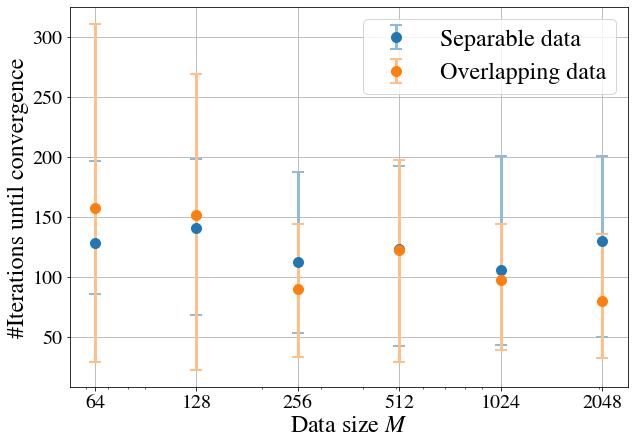

In [18]:
plt.figure(figsize=(10,7))
labels =['Separable data', 'Overlapping data']
for i, sep in enumerate(['separable', 'overlap']):
    df = pd.read_csv(f'{pre}M_{sep}.csv')
    tol = 1e-4
    Ms = np.array(list(set(df['M'])))
    df = df[df['Tol'] == tol]
    samples = 10
    convergences = np.array([df['Convergence'][df['M'] == M][:samples] for M in Ms])
    acc = np.array([df['Accuracy'][df['M'] == M][:samples] for M in Ms])
    print(convergences)
    print(acc)
    means = np.mean(convergences, axis = 1)
    lower = np.quantile(convergences, lower_percentile, axis=1)
    upper = np.quantile(convergences, upper_percentile, axis=1)
    errors = np.array([means - lower, upper - means])

    plt.errorbar(Ms,means,yerr=errors,marker='.',ecolor=colors_light[i],elinewidth=3.,ls='',capsize=6,
            color=colors[i], ms=20,capthick=2., label=labels[i])
            
plt.xscale('log')

plt.xticks(Ms,[int(M) for M in Ms])
plt.grid()
plt.legend()
plt.ylabel('#Iterations until convergence')
plt.xlabel(r'Data size $M$')

plt.savefig(f'plots/approx_M.png',dpi=300,bbox_inches='tight')

[[268. 256.  59. 226. 294.  38. 127.  75.  38. 174.]
 [109.  96.  48. 194. 103.  27. 139. 153. 133. 248.]
 [ 80.  92. 111. 416.  21.  91.  82. 105. 135.  31.]
 [194. 119. 300.  64.  66. 189.   9.  93.  13. 441.]
 [202.  15. 118.  62. 246.  30.  66.  25.  62. 144.]]
[[0.8984375  0.91796875 0.94921875 0.85546875 0.87109375 0.96484375
  0.99609375 0.92578125 0.83984375 0.87109375]
 [0.9296875  0.9921875  0.9140625  0.94140625 0.8984375  0.8828125
  0.90234375 0.92578125 0.89453125 0.9765625 ]
 [0.9453125  0.95703125 0.94921875 0.8671875  0.96484375 0.859375
  0.91015625 0.9375     0.9140625  0.921875  ]
 [0.8984375  0.8828125  0.81640625 0.80859375 0.953125   0.88671875
  0.2109375  0.9453125  0.90234375 0.94921875]
 [0.890625   0.79296875 0.8203125  0.89453125 0.71484375 0.80078125
  0.83984375 0.6796875  0.984375   0.9453125 ]]
[[465. 129. 401.  74. 513. 178. 203.  79. 260. 127.]
 [103.  28.  65. 117.  38. 109. 199. 267. 108. 194.]
 [ 84.  52. 321. 325.  21. 191.  79. 190. 152.   2.]
 [

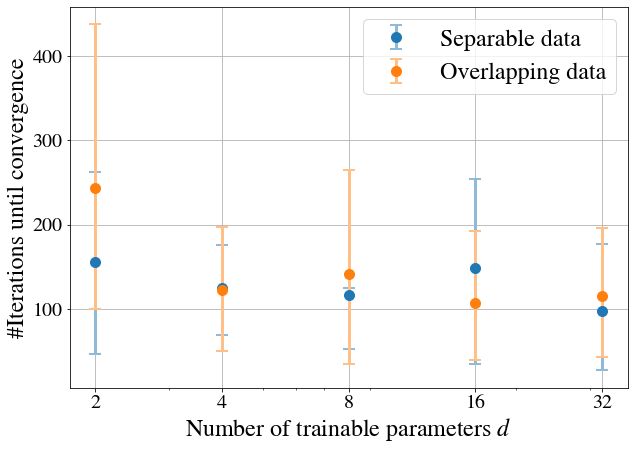

In [19]:
plt.figure(figsize=(10,7))
labels =['Separable data', 'Overlapping data']
for i, sep in enumerate(['separable', 'overlap']):
    df = pd.read_csv(f'features=2/d_{sep}.csv')
    tol = 1e-4
    ds = list(set(df['d']))
    ds.sort()
    ds = np.array(ds)
    df = df[df['Tol'] == tol]
    samples = 10
    convergences = np.array([df['Convergence'][df['d'] == d][:samples] for d in ds])
    acc = np.array([df['Accuracy'][df['d'] == d][:samples] for d in ds])
    print(convergences)
    print(acc)
    means = np.mean(convergences, axis = 1)
    lower = np.quantile(convergences, lower_percentile, axis=1)
    upper = np.quantile(convergences, upper_percentile, axis=1)
    errors = np.array([means - lower, upper - means])

    plt.errorbar(ds,means,yerr=errors,marker='.',ecolor=colors_light[i],elinewidth=3.,ls='',capsize=6,
            color=colors[i], ms=20,capthick=2., label=labels[i])
            
plt.xscale('log')

plt.xticks(ds,[int(d) for d in ds])
plt.grid()
plt.legend()
plt.ylabel('#Iterations until convergence')
plt.xlabel(r'Number of trainable parameters $d$')

plt.savefig(f'plots/approx_d.png',dpi=300,bbox_inches='tight')